#source from 
#1. kaggle: Multilingual Customer Support Email Tickets
#(kaggle datasets download -d tobiasbueck/multilingual-customer-support-tickets)

#2. hugging face : cardiffnlp/twitter-roberta-base-sentiment-latest 
   # Use a pipeline as a high-level helper
    #from transformers import pipeline
    #pipe = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-sentiment-latest")

  # Load model directly
    #from transformers import AutoTokenizer, AutoModelForSequenceClassification
    #tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
    #model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")

In [2]:
import pandas as pd
df_fullsent = pd.read_csv('fulldata_sentiment_analysis_results.csv')
df_fullsent.sample(20)



,queue,priority,language,subcategory,subject,text,sentiment,sentiment_label,sentiment_score
3046,HARDWARE,MEDIUM,DE,Smart-Garagentoröffner,Probleme mit Smart-Garagentoröffner,"Guten Tag, seit dem letzten Update funktionier...","{'label': 'neutral', 'score': 0.5981893539428711}",neutral,0.598189
3120,ACCOUNTING,HIGH,ES,Customer Inquiries::Feedback,Urgente: Cambio de factura por mixma,"Hola equipo, necesito urgentemente una nueva f...","{'label': 'neutral', 'score': 0.809178352355957}",neutral,0.809178
3050,SOFTWARE,HIGH,EN,Adobe Photoshop CC 2021,URGENT: Adobe Photoshop CC 2021 not starting -...,"Hello, I have a critical issue with Adobe Phot...","{'label': 'negative', 'score': 0.8933992385864...",negative,0.893399
2861,ACCOUNTING,LOW,EN,Customer Inquiries::Feedback,Small Request for Upcoming Invoice,Could you add our enterprise name on the next ...,"{'label': 'negative', 'score': 0.5448018312454...",negative,0.544802
10,ACCOUNTING,MEDIUM,EN,Employee Inquiries::Accounting::Payroll,Inquiry About Payroll Update,"Dear Support,\n\nI recently noticed a bug in t...","{'label': 'negative', 'score': 0.7182913422584...",negative,0.718291
5054,ACCOUNTING,HIGH,DE,Customer Inquiries::Product Inquiries,Dringend! Philips-Lichtsteuerung kaputt,Ich kann meine Philips-LightStars plötzlich ni...,"{'label': 'neutral', 'score': 0.785390317440033}",neutral,0.785390
2322,ACCOUNTING,HIGH,ES,Employee Inquiries::Staff Development,URGENTE - Acceso denegado a software crítico,"Hola equipo de soporte, he sido bloqueado de n...","{'label': 'neutral', 'score': 0.7466942667961121}",neutral,0.746694
8010,HARDWARE,MEDIUM,EN,Externe Festplatte,Issue With External Hard Drive - Unexpected Di...,"Dear Support Team, I recently bought an extern...","{'label': 'negative', 'score': 0.723351776599884}",negative,0.723352
5981,HARDWARE,HIGH,EN,Kopfhörer,Urgent: Headphones Won't Turn On,"Hello support team, I recently purchased a pai...","{'label': 'negative', 'score': 0.7363348603248...",negative,0.736335
8048,SOFTWARE,HIGH,EN,Instagram Ads,Urgent: Instagram Ads account inaccessible – i...,"Hello Support Team,I've encountered a critical...","{'label': 'negative', 'score': 0.8541293144226...",negative,0.854129


In [6]:
df_fullsent['sentiment_label'].unique()

array(['negative', 'neutral', 'positive', 'ERROR'], dtype=object)

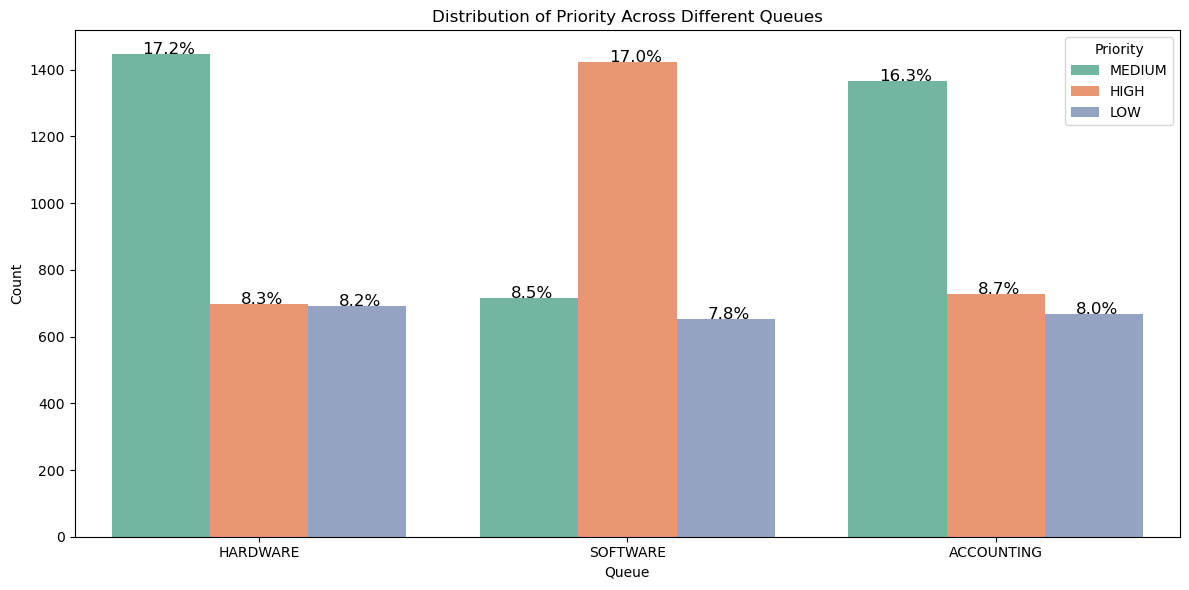

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#Distribution of Priority Across Different Queues:

# Set up the figure and axes for priority distribution across different queues with different colors
plt.figure(figsize=(12, 6))
sns.countplot(x='queue', hue='priority', data=df_fullsent, palette='Set2')
plt.title('Distribution of Priority Across Different Queues')
plt.xlabel('Queue')
plt.ylabel('Count')

# Calculate percentages
total = len(df_fullsent['queue'])
for p in plt.gca().patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2 - 0.05
    y = p.get_y() + p.get_height()
    plt.gca().annotate(percentage, (x, y), size=12)

plt.legend(title='Priority')
plt.tight_layout()
plt.show()


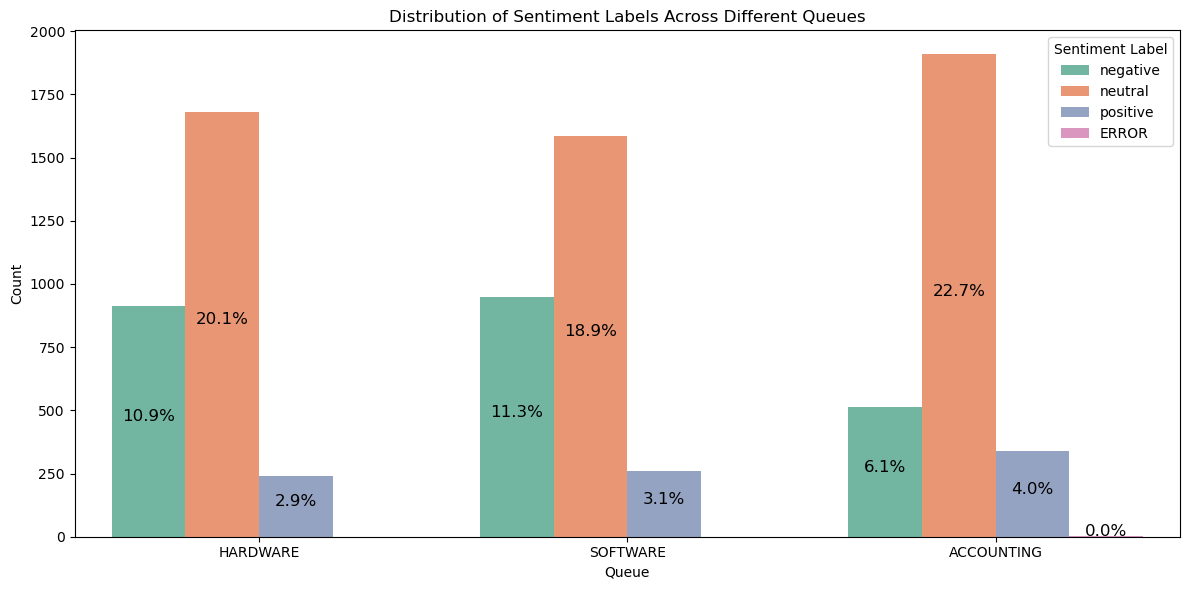

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set up the figure and axes for sentiment label distribution across queues with different colors
plt.figure(figsize=(12, 6))
sns.countplot(x='queue', hue='sentiment_label', data=df_fullsent, palette='Set2')
plt.title('Distribution of Sentiment Labels Across Different Queues')
plt.xlabel('Queue')
plt.ylabel('Count')

# Calculate percentages for each queue and sentiment label combination
total_counts = df_fullsent.groupby(['queue', 'sentiment_label']).size().reset_index(name='counts')
total = len(df_fullsent['queue'])
for p in plt.gca().patches:
    height = p.get_height()
    if height == 0:
        continue
    queue = p.get_x() + p.get_width() / 2
    sentiment = p.get_y() + height / 2
    percentage = f'{100 * height / total:.1f}%'
    plt.gca().annotate(percentage, (queue, sentiment), size=12, ha='center')

plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()


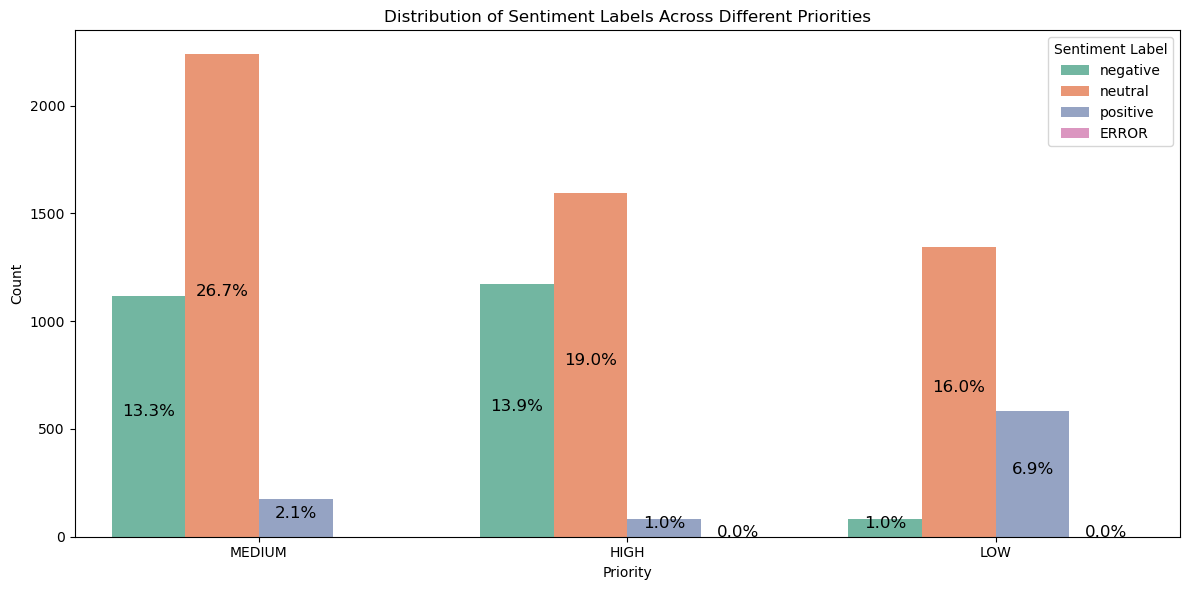

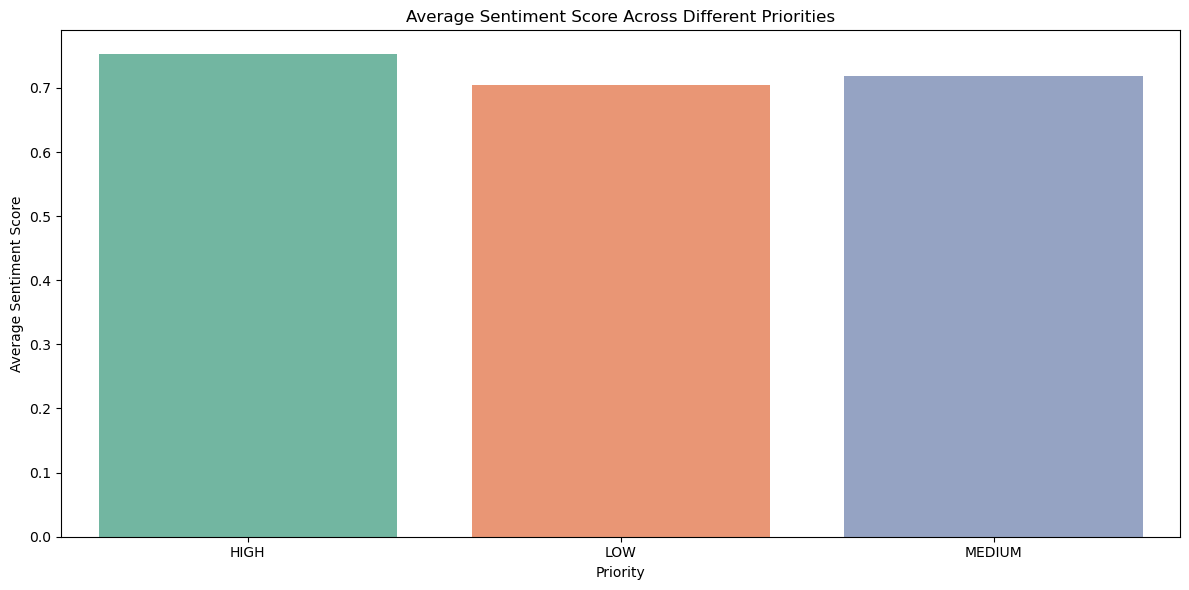

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set up the figure and axes for sentiment label distribution across priorities with different colors
plt.figure(figsize=(12, 6))
sns.countplot(x='priority', hue='sentiment_label', data=df_fullsent, palette='Set2')
plt.title('Distribution of Sentiment Labels Across Different Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')

# Calculate percentages for each priority and sentiment label combination
total_counts = df_fullsent.groupby(['priority', 'sentiment_label']).size().reset_index(name='counts')
total = len(df_fullsent['priority'])
for p in plt.gca().patches:
    height = p.get_height()
    if height == 0:
        continue
    priority = p.get_x() + p.get_width() / 2
    sentiment = p.get_y() + height / 2
    percentage = f'{100 * height / total:.1f}%'
    plt.gca().annotate(percentage, (priority, sentiment), size=12, ha='center')

plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

# Calculate the average sentiment score for each priority
avg_sentiment_score_priority = df_fullsent.groupby('priority')['sentiment_score'].mean().reset_index()

# Set up the figure and axes for average sentiment score across priorities
plt.figure(figsize=(12, 6))
sns.barplot(x='priority', y='sentiment_score', data=avg_sentiment_score_priority, palette='Set2')
plt.title('Average Sentiment Score Across Different Priorities')
plt.xlabel('Priority')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()


Insights:
1. High Priority Issues:
    * A significant portion of high-priority tickets is associated with negative sentiment, indicating that these urgent issues often result in customer dissatisfaction. This suggests that improving the resolution process for high-priority tickets could have a positive impact on overall customer satisfaction.
2. Medium and Low Priority Issues:
    * The majority of medium and low-priority tickets have neutral sentiment. This suggests that while these issues may not be causing significant dissatisfaction, there is room for improvement to turn neutral feedback into positive feedback.
3. Resource Allocation and Process Improvement:
    * Allocating more resources to address high-priority tickets effectively and quickly can help reduce negative feedback.
    * Analyzing medium-priority tickets to identify common issues and improve the support process can help convert neutral feedback to positive feedback.

Correlation between Sentiment and Priority:
* Hardware and Software Queues:
    * The high proportion of neutral feedback corresponds to the high number of medium priority tickets. This might suggest that issues classified as medium priority often receive neutral feedback, indicating neither satisfaction nor dissatisfaction.
    * The considerable amount of negative feedback aligns with the significant number of high priority tickets, suggesting that urgent issues often result in negative feedback due to their impact on the user experience.
    * Positive feedback being minimal suggests that low priority tickets do not necessarily correlate with high satisfaction, but rather that issues are resolved with neutral outcomes.

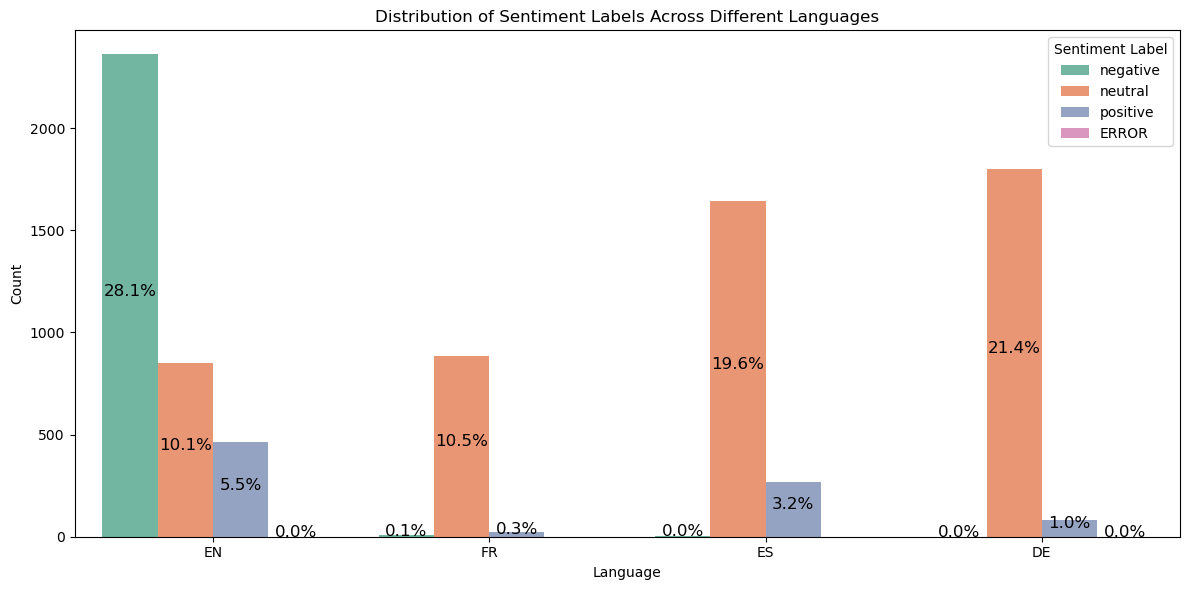

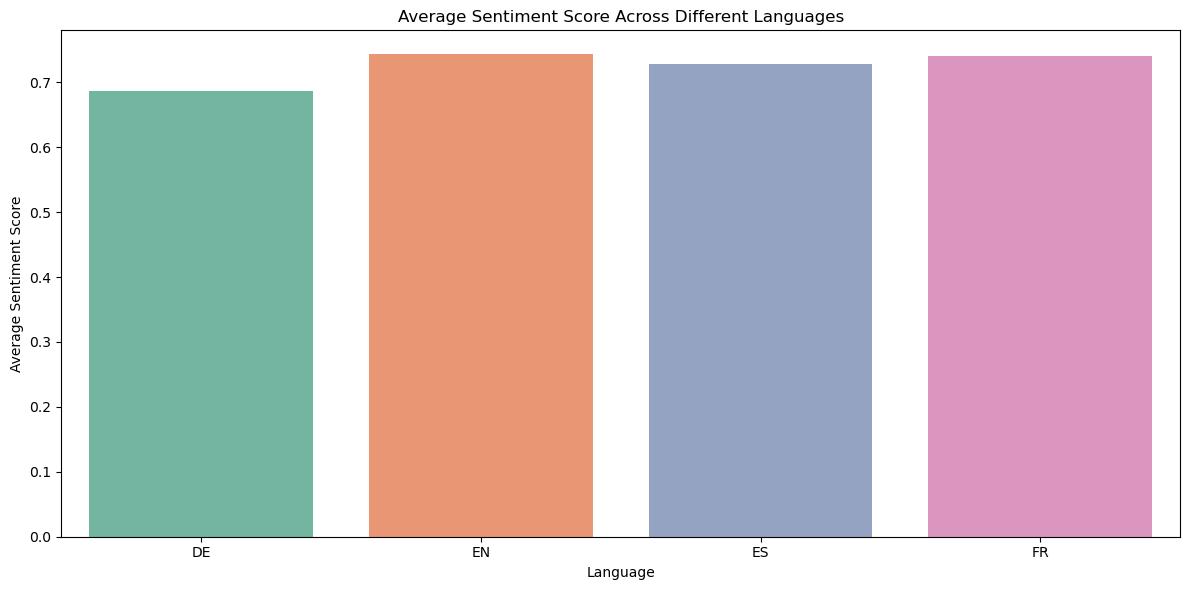

In [10]:
#Analyze sentiment by language.


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set up the figure and axes for sentiment label distribution across languages with different colors
plt.figure(figsize=(12, 6))
sns.countplot(x='language', hue='sentiment_label', data=df_fullsent, palette='Set2')
plt.title('Distribution of Sentiment Labels Across Different Languages')
plt.xlabel('Language')
plt.ylabel('Count')

# Calculate percentages for each language and sentiment label combination
total_counts = df_fullsent.groupby(['language', 'sentiment_label']).size().reset_index(name='counts')
total = len(df_fullsent['language'])
for p in plt.gca().patches:
    height = p.get_height()
    if height == 0:
        continue
    language = p.get_x() + p.get_width() / 2
    sentiment = p.get_y() + height / 2
    percentage = f'{100 * height / total:.1f}%'
    plt.gca().annotate(percentage, (language, sentiment), size=12, ha='center')

plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

# Calculate the average sentiment score for each language
avg_sentiment_score_language = df_fullsent.groupby('language')['sentiment_score'].mean().reset_index()

# Set up the figure and axes for average sentiment score across languages
plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='sentiment_score', data=avg_sentiment_score_language, palette='Set2')
plt.title('Average Sentiment Score Across Different Languages')
plt.xlabel('Language')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()


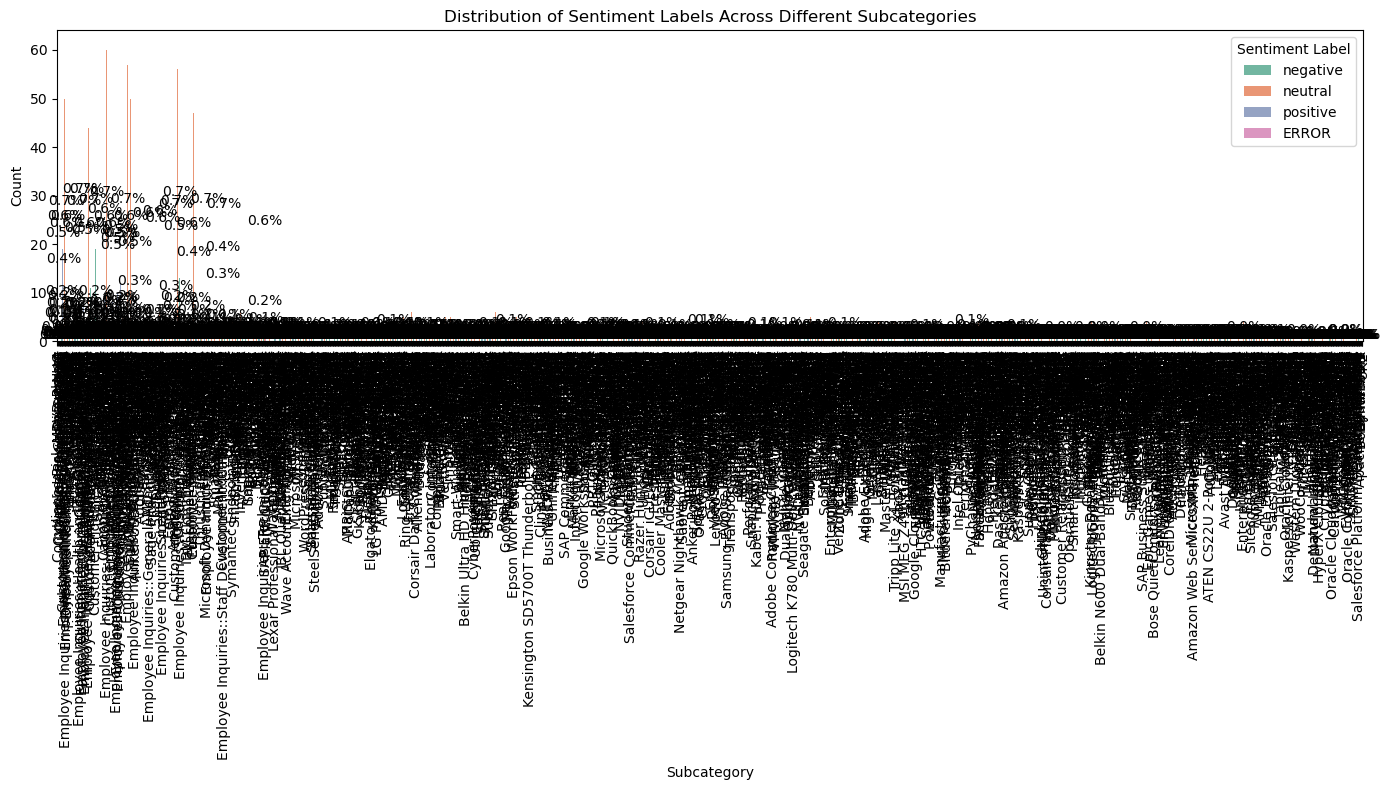

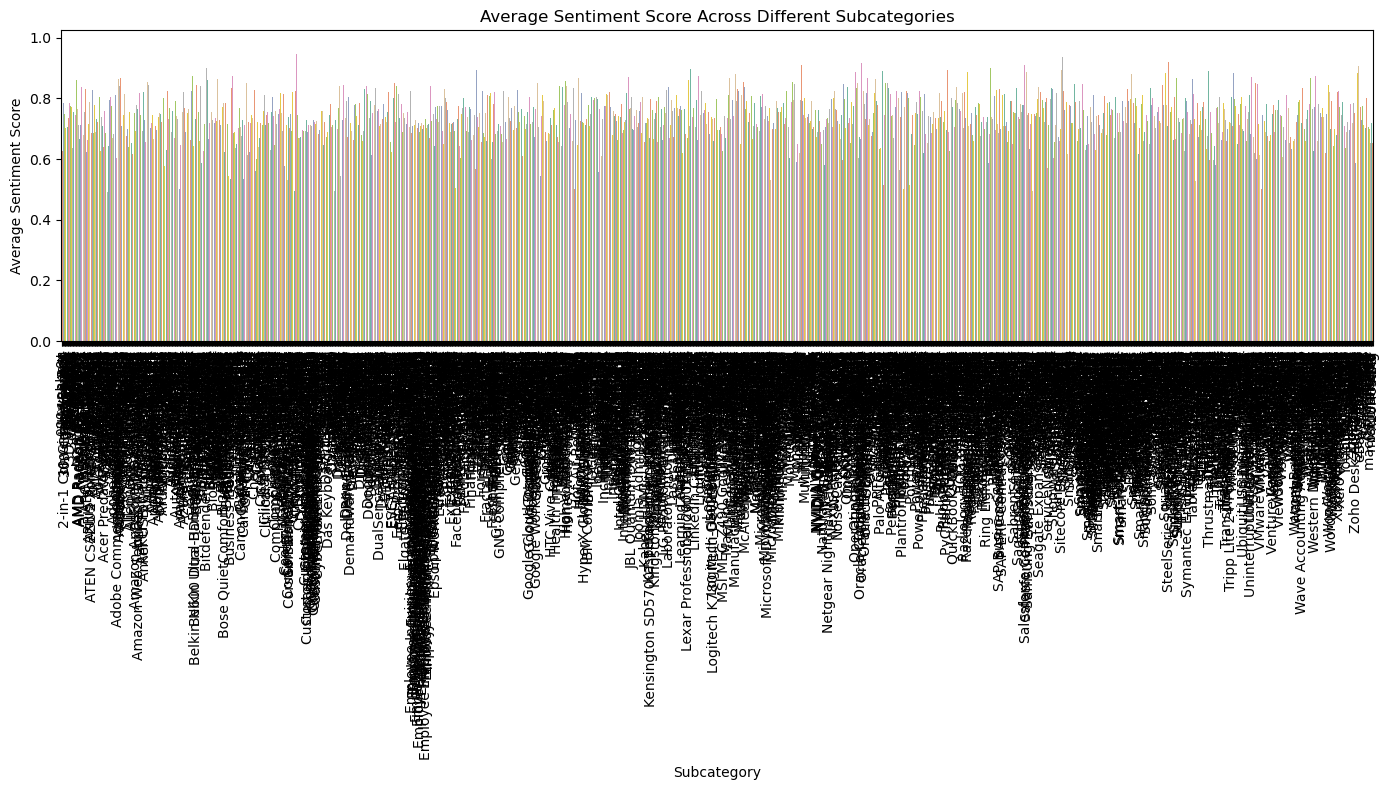

In [11]:
#What about feedback by subcategory?

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Set up the figure and axes for sentiment label distribution across subcategories with different colors
plt.figure(figsize=(14, 8))
sns.countplot(x='subcategory', hue='sentiment_label', data=df_fullsent, palette='Set2')
plt.title('Distribution of Sentiment Labels Across Different Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=90)

# Calculate percentages for each subcategory and sentiment label combination
total_counts = df_fullsent.groupby(['subcategory', 'sentiment_label']).size().reset_index(name='counts')
total = len(df_fullsent['subcategory'])
for p in plt.gca().patches:
    height = p.get_height()
    if height == 0:
        continue
    subcategory = p.get_x() + p.get_width() / 2
    sentiment = p.get_y() + height / 2
    percentage = f'{100 * height / total:.1f}%'
    plt.gca().annotate(percentage, (subcategory, sentiment), size=10, ha='center')

plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

# Calculate the average sentiment score for each subcategory
avg_sentiment_score_subcategory = df_fullsent.groupby('subcategory')['sentiment_score'].mean().reset_index()

# Set up the figure and axes for average sentiment score across subcategories
plt.figure(figsize=(14, 8))
sns.barplot(x='subcategory', y='sentiment_score', data=avg_sentiment_score_subcategory, palette='Set2')
plt.title('Average Sentiment Score Across Different Subcategories')
plt.xlabel('Subcategory')
plt.ylabel('Average Sentiment Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


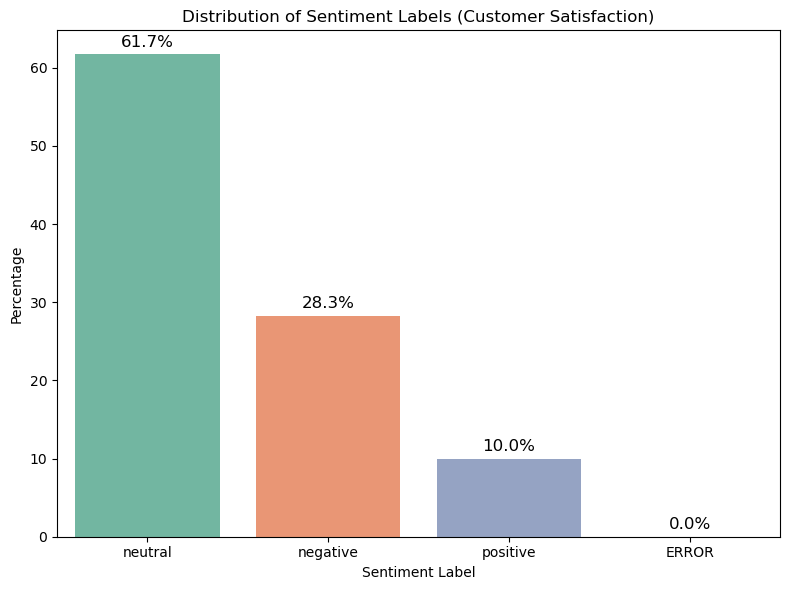

Average Sentiment Score: 0.73


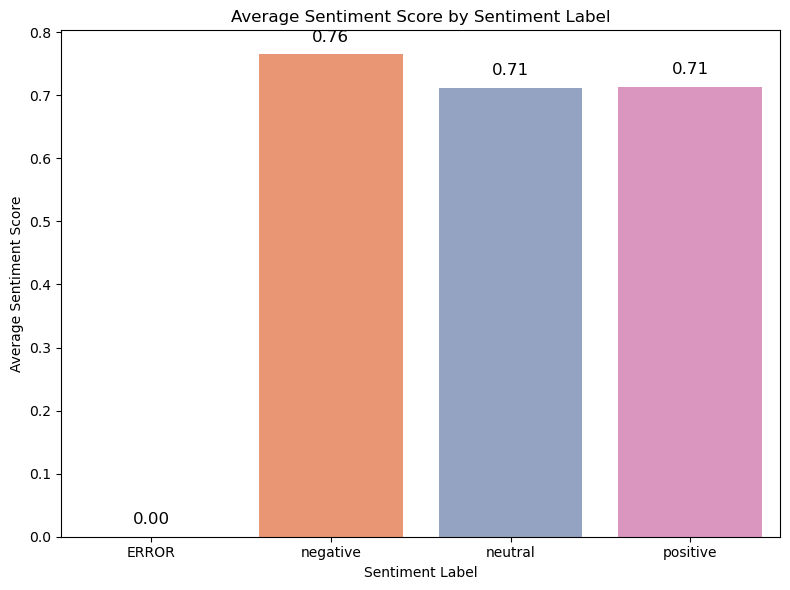

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the proportion of positive, neutral, and negative feedback
sentiment_distribution = df_fullsent['sentiment_label'].value_counts(normalize=True) * 100

# Visualize the distribution of sentiment labels
plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='Set2')
plt.title('Distribution of Sentiment Labels (Customer Satisfaction)')
plt.xlabel('Sentiment Label')
plt.ylabel('Percentage')
for i, v in enumerate(sentiment_distribution.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', size=12)
plt.tight_layout()
plt.show()

# Calculate the average sentiment score
average_sentiment_score = df_fullsent['sentiment_score'].mean()

# Display the average sentiment score
print(f'Average Sentiment Score: {average_sentiment_score:.2f}')

# Calculate the average sentiment score for each sentiment label
avg_sentiment_score_by_label = df_fullsent.groupby('sentiment_label')['sentiment_score'].mean().reset_index()

# Visualize the average sentiment score by sentiment label
plt.figure(figsize=(8, 6))
sns.barplot(x='sentiment_label', y='sentiment_score', data=avg_sentiment_score_by_label, palette='Set2')
plt.title('Average Sentiment Score by Sentiment Label')
plt.xlabel('Sentiment Label')
plt.ylabel('Average Sentiment Score')
for i, row in avg_sentiment_score_by_label.iterrows():
    plt.text(i, row['sentiment_score'] + 0.02, f'{row["sentiment_score"]:.2f}', ha='center', size=12)
plt.tight_layout()
plt.show()


Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8388 entries, 0 to 8387
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   queue            8388 non-null   object 
 1   priority         8388 non-null   object 
 2   language         8388 non-null   object 
 3   subcategory      8388 non-null   object 
 4   subject          8388 non-null   object 
 5   text             8388 non-null   object 
 6   sentiment        8388 non-null   object 
 7   sentiment_label  8388 non-null   object 
 8   sentiment_score  8388 non-null   float64
dtypes: float64(1), object(8)
memory usage: 589.9+ KB
None

Basic Statistics:
       sentiment_score
count      8388.000000
mean          0.726542
std           0.108761
min           0.000000
25%           0.655897
50%           0.736199
75%           0.804690
max           0.985372


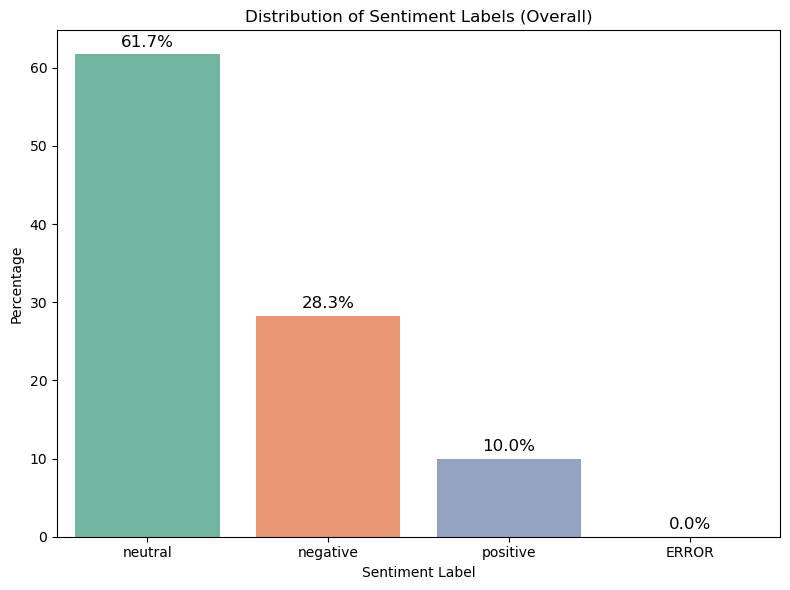

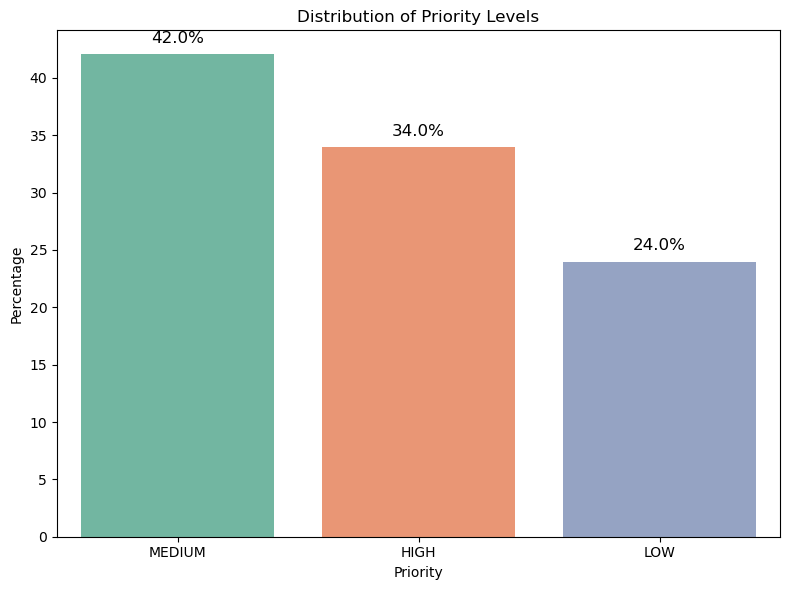

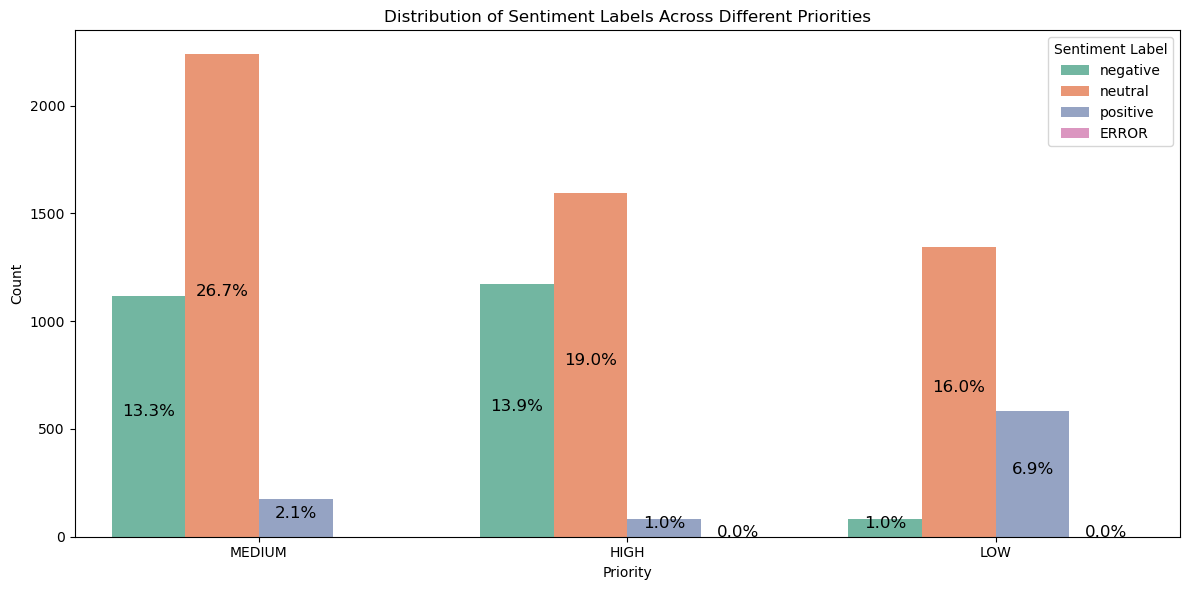

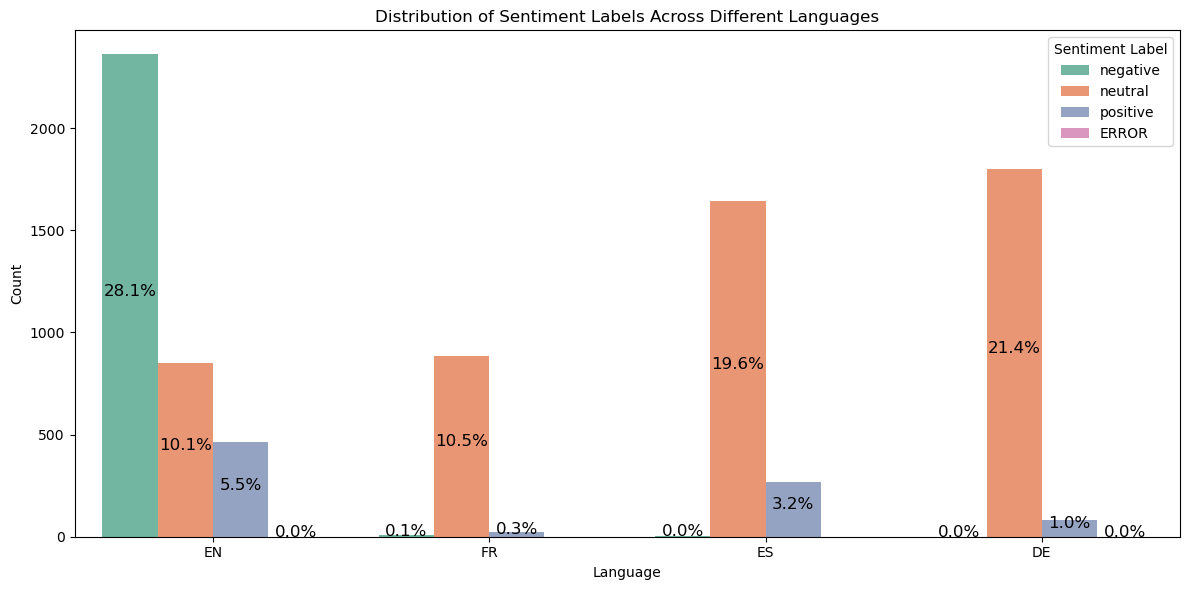

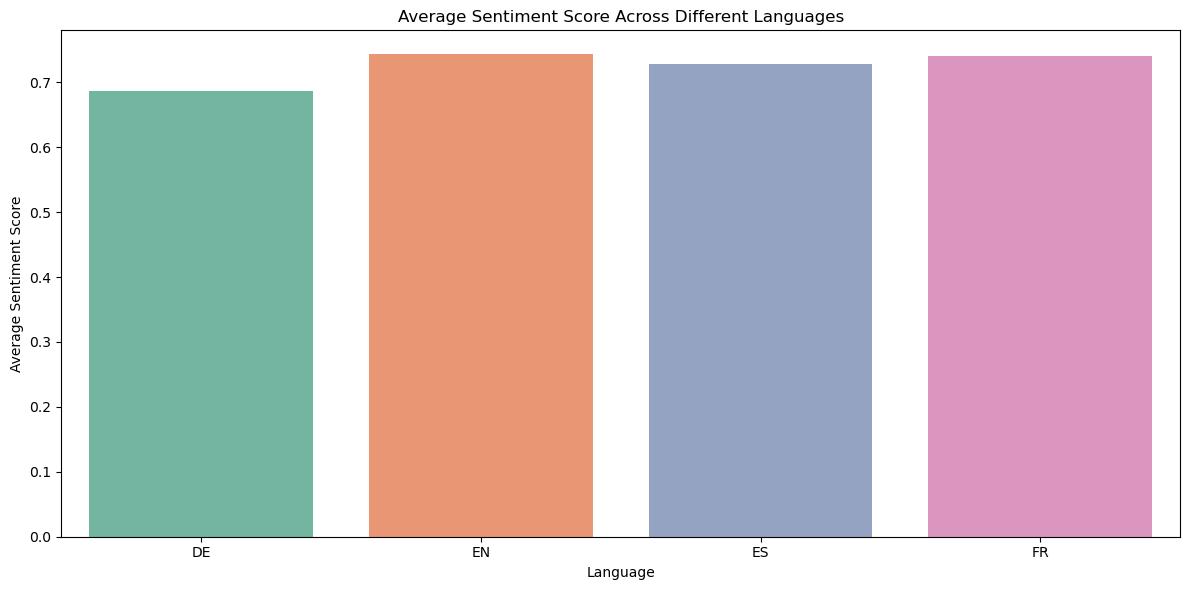

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# General Overview
print("Dataset Overview:")
print(df_fullsent.info())
print("\nBasic Statistics:")
print(df_fullsent.describe())

# Sentiment Distribution
sentiment_distribution = df_fullsent['sentiment_label'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=sentiment_distribution.index, y=sentiment_distribution.values, palette='Set2')
plt.title('Distribution of Sentiment Labels (Overall)')
plt.xlabel('Sentiment Label')
plt.ylabel('Percentage')
for i, v in enumerate(sentiment_distribution.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', size=12)
plt.tight_layout()
plt.show()

# Priority Distribution
priority_distribution = df_fullsent['priority'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6))
sns.barplot(x=priority_distribution.index, y=priority_distribution.values, palette='Set2')
plt.title('Distribution of Priority Levels')
plt.xlabel('Priority')
plt.ylabel('Percentage')
for i, v in enumerate(priority_distribution.values):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center', size=12)
plt.tight_layout()
plt.show()

# Sentiment Distribution by Priority
plt.figure(figsize=(12, 6))
sns.countplot(x='priority', hue='sentiment_label', data=df_fullsent, palette='Set2')
plt.title('Distribution of Sentiment Labels Across Different Priorities')
plt.xlabel('Priority')
plt.ylabel('Count')

total = len(df_fullsent['priority'])
for p in plt.gca().patches:
    height = p.get_height()
    if height == 0:
        continue
    priority = p.get_x() + p.get_width() / 2
    sentiment = p.get_y() + height / 2
    percentage = f'{100 * height / total:.1f}%'
    plt.gca().annotate(percentage, (priority, sentiment), size=12, ha='center')

plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

# Sentiment by Language
plt.figure(figsize=(12, 6))
sns.countplot(x='language', hue='sentiment_label', data=df_fullsent, palette='Set2')
plt.title('Distribution of Sentiment Labels Across Different Languages')
plt.xlabel('Language')
plt.ylabel('Count')

total = len(df_fullsent['language'])
for p in plt.gca().patches:
    height = p.get_height()
    if height == 0:
        continue
    language = p.get_x() + p.get_width() / 2
    sentiment = p.get_y() + height / 2
    percentage = f'{100 * height / total:.1f}%'
    plt.gca().annotate(percentage, (language, sentiment), size=12, ha='center')

plt.legend(title='Sentiment Label')
plt.tight_layout()
plt.show()

# Average Sentiment Score by Language
avg_sentiment_score_language = df_fullsent.groupby('language')['sentiment_score'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='language', y='sentiment_score', data=avg_sentiment_score_language, palette='Set2')
plt.title('Average Sentiment Score Across Different Languages')
plt.xlabel('Language')
plt.ylabel('Average Sentiment Score')
plt.tight_layout()
plt.show()


General Overview

Basic statistics and structure of the dataset.
Sentiment Distribution

Distribution of sentiment labels across the entire dataset.
Priority Distribution

Distribution of priorities across the dataset.
Sentiment distribution across different priority levels.
Sentiment by Language

Distribution of sentiment labels by language.
Average sentiment score by language.

Top Keywords in Subject Column:
software         323.323598
update           322.664431
invoice          252.338483
urgent           246.034675
request          237.135719
issue            228.613290
actualización    172.300322
inquiry          155.408587
la               143.826003
bug              136.735711
problema         133.273919
en               132.319142
urgente          130.775602
factura          122.977200
minor            110.178221
smart            109.632552
für              109.474378
needed           100.449455
problème          96.869805
solicitud         96.418233
dtype: float64

Top Keywords in Text Column:
team        244.925517
support     236.399329
software    222.832645
update      220.189861
ich         195.325954
la          192.086269
invoice     162.979781
mi          159.749759
need        157.860845
dear        151.211391
en          138.561309
ve          137.807470
issue       136.707758
es          133.598110
ein         132.390035
bug         130.11

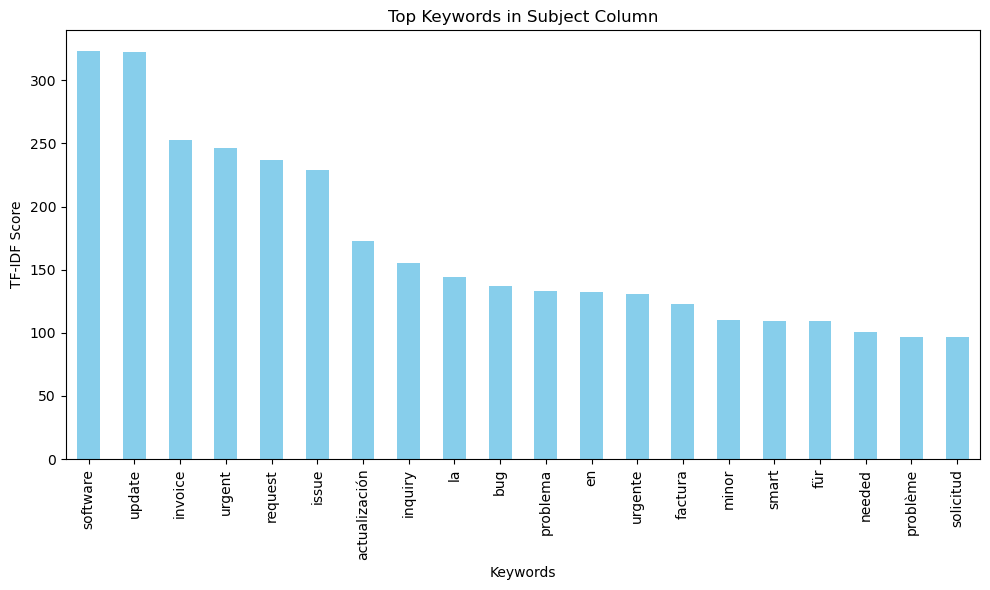

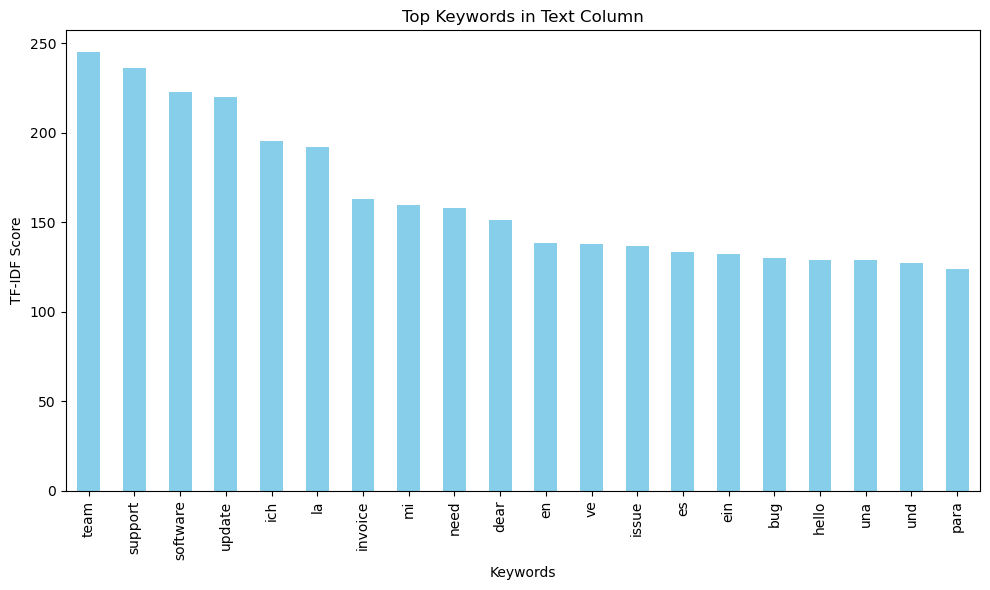

In [15]:
#To find the keywords from the subject and text columns


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string



# Combine stop words and punctuation
stop_words = ENGLISH_STOP_WORDS.union(set(string.punctuation))

# Function to preprocess text data
def preprocess_text(text):
    return ' '.join([word for word in text.lower().split() if word not in stop_words])

# Preprocess the subject and text columns
df_fullsent['subject_clean'] = df_fullsent['subject'].apply(preprocess_text)
df_fullsent['text_clean'] = df_fullsent['text'].apply(preprocess_text)

# Function to extract top keywords using TF-IDF
def extract_top_keywords(column, top_n=20):
    vectorizer = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')
    tfidf_matrix = vectorizer.fit_transform(df_fullsent[column])
    tfidf_scores = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.get_feature_names_out())
    top_keywords = tfidf_scores.sum(axis=1).sort_values(ascending=False).head(top_n)
    return top_keywords

# Extract top keywords for subject and text columns
top_keywords_subject = extract_top_keywords('subject_clean', top_n=20)
top_keywords_text = extract_top_keywords('text_clean', top_n=20)

# Display the top keywords
print("Top Keywords in Subject Column:")
print(top_keywords_subject)

print("\nTop Keywords in Text Column:")
print(top_keywords_text)

# Plot the top keywords for subject column
plt.figure(figsize=(10, 6))
top_keywords_subject.plot(kind='bar', color='skyblue')
plt.title('Top Keywords in Subject Column')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')
plt.tight_layout()
plt.show()

# Plot the top keywords for text column
plt.figure(figsize=(10, 6))
top_keywords_text.plot(kind='bar', color='skyblue')
plt.title('Top Keywords in Text Column')
plt.xlabel('Keywords')
plt.ylabel('TF-IDF Score')
plt.tight_layout()
plt.show()


In [17]:
pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 875.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


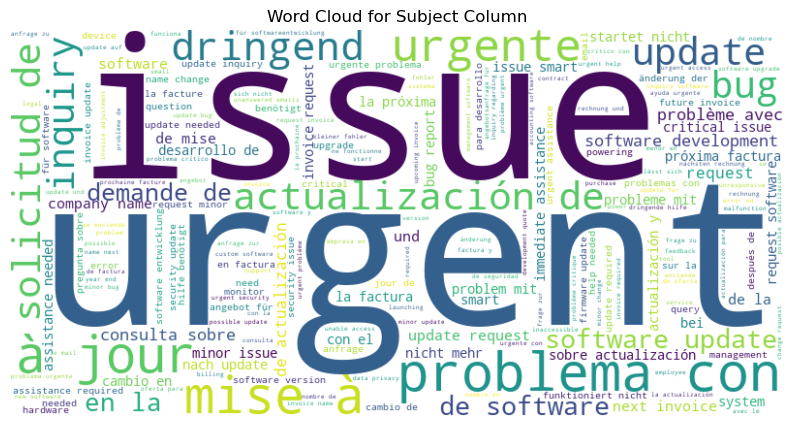

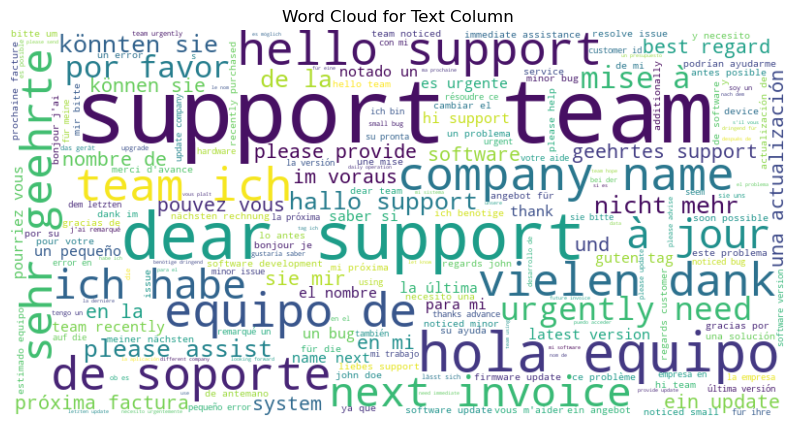

In [18]:
# Word clouds 


import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import string



# Combine stop words and punctuation
stop_words = set(STOPWORDS).union(set(string.punctuation))

# Function to preprocess text data
def preprocess_text(text):
    return ' '.join([word for word in text.lower().split() if word not in stop_words])

# Preprocess the subject and text columns
df_fullsent['subject_clean'] = df_fullsent['subject'].apply(preprocess_text)
df_fullsent['text_clean'] = df_fullsent['text'].apply(preprocess_text)

# Generate word cloud for subject column
subject_text = ' '.join(df_fullsent['subject_clean'])
subject_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(subject_text)

# Generate word cloud for text column
text_text = ' '.join(df_fullsent['text_clean'])
text_wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text_text)

# Display the word cloud for subject column
plt.figure(figsize=(10, 6))
plt.imshow(subject_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Subject Column')
plt.show()

# Display the word cloud for text column
plt.figure(figsize=(10, 6))
plt.imshow(text_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Text Column')
plt.show()
